In [15]:
!pip install wordcloud
!pip install pandas

In [16]:
import nltk
import re
from nltk.corpus import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize 
import sys
import time

In [17]:
corpus_root=r'C:\Users\kimyujin\Desktop\2020 3-2학기\인공지능\sentence_tokenized' #제 컴퓨터에 있는 sentece_tokenize 버전의 경로입니다.
gniCorpus=PlaintextCorpusReader(corpus_root,'.*\.txt',encoding='utf-8')

In [18]:
#year=input('워드클라우드를 생성할 연도를 적어주세요. EX]2011 \n:') 
#사용자가 원하는 연도에 따른 워드클라우드를 만들수있도록 발전시킬 계획입니다.
#현재는 2018년 논문에 대해서 워드클라우드를 만들어주고 있습니다.

In [28]:
li=[]
year='2018'    #2018년 논문들에 대한 워드클라우드 분석을 합니다.
for i in range(0,len(gniCorpus.fileids())):
    if((gniCorpus.fileids()[i][4:6])==str(int(year)-2002)):     #fileid의 [4:6]에 해당하는 부분은 논문 연도에 2002를 뺀 숫자입니다.
            li.append(gniCorpus.fileids()[i])                   #즉, 여기서는 2018년 논문들을 뽑아내고 있습니다.

In [20]:
gniRaw=gniCorpus.raw(li)   #2018년 논문들에 raw()를 적용합니다.

In [21]:
plus_stopwords_to_remove = ['\\n','sample', '\n\n', 'n', 'Fig','number','study','analysis', '\\', 'Title:','result','Title','using','used','Table','based'] 
#gni논문들에 대한 stopword를 추가했습니다.
STOPWORDS = STOPWORDS.union(set(plus_stopwords_to_remove))
stopwords_made = set(STOPWORDS)

text = gniRaw
keyword_list=[] #2018년의 주요 키워드 20개를 저장할 리스트
searchKwd='' #searchKwd는 후에 사용자가 입력하는 키워드로, 사용자가 찾고자하는 키워드입니다.

In [22]:
def showingWordcloud():    #워드클라우드를 만들고 출력하는 함수입니다.
    global keyword_list    #글로벌 변수 keyword_list를 사용합니다.
    wordcloud = WordCloud(
                    width = 1600, height = 1400,
                    background_color='white',
                    max_words=400,
                    collocations=False,
                    stopwords = stopwords_made,   #위에서 만들었던 stopword를 불용어로 둡니다.
                    min_font_size = 30,
                    #mask = gni_mask
                    ).generate(gniRaw)

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

    plt.show()   #워드클라우드를 보여줍니다.
    keyword_list=list(wordcloud.words_.items())    #워드클라우드에 등장하는 단어들을 빈도순으로 keyword_list에 저장합니다.


In [23]:
def appearWord():   #2018년의 주요 키워드들 중 최상위 20개 keyword를 보여주는 함수입니다.
    global searchKwd
    print(year+'년 G&I논문에 가장 많이 등장한 단어 20개는 다음과 같아요!\n')

    Ranklist = ['Rank '+str(n+1) for n in range(20)]
    KeynManylist = []
    for i in range(0,20):  #KeyManylist에 상위 20개 키워드와 빈도를 저장합니다.
            KeynManylist.append([keyword_list[i][0],round(keyword_list[i][1],3)])

    df = pd.DataFrame(data = np.array(KeynManylist),
                      index = Ranklist, 
                      columns = ['키워드', '빈도']  )

    display(df)
    time.sleep(2)
    searchKwd=input('[키워드로 논문찾기]\n'+'위의 20개 중 원하는 키워드를 입력하세요! '+year+'년의 논문 중 키워드를 언급한 논문들을 찾아줄게요. ex) RNA \n찾고싶은 키워드가 없다면 없음 이라고 입력해주세요.\n')
    #2018년 논문의 상위 20개 키워드 중 사용자는 등장하는 논문들을 보고싶은 키워드를 선택합니다.

In [24]:
findList=[]

In [25]:
def make_clickable(val): #pandas에서 url을 클릭할 수 있도록 만들기 위해 정의한 함수입니다.
       return '<a href="{}">{}</a>'.format(val, val)

In [26]:
def findSentence(): #사용자가 입력한 searchKwd가 등장하는 논문들과, 등장 횟수 등을 알려주는 함수입니다.
    global searchKwd
    a=0
    global findList
    findList=[]
    
    for k in range(0,20):
        if(searchKwd == keyword_list[k][0]):  #만약 사용자가 입력한 키워드가 상위 20개 키워드 중 존재한다면 a=1이 됩니다.
            a+=1
            break
        elif(searchKwd=='없음'):    #만약 사용자가 '없음'을 입력했다면 a=2가 됩니다.
            a=2
            
    if a==1:       #사용자가 입력한 키워드에 대해 '키워드가 등장한 논문', '해당 논문의 링크', '등장한 횟수' 등을 보여줍니다.
        for i in range(0,len(li)):
            globals()['rawFor{}'.format(i)]=gniCorpus.raw(li[i])
            if searchKwd in globals()['rawFor{}'.format(i)]:  #키워드가 논문에 등장한다면
                rawfile=globals()['rawFor{}'.format(i)]
                findkeySent=sent_tokenize(rawfile)  #해당 논문을 sent_tokenize해서
                #print(findkeySent)
                paperTitle = (((findkeySent[0].split('Title: '))[1]).split('\n\n'))[0]  #제목을 추출합니다.
                if(year=='2018'):  
                    findList.append(dict(논문명=paperTitle,등장횟수=rawfile.count(searchKwd),url='https://genominfo.org/upload/pdf/'+'gi-'+year+'-'+(li[i].split('.txt')[0]).split('gni-')[1]+'.pdf'))
                    #findList에 논문명, 등장횟수, url을 추가합니다. 2018년 논문들은 gni 사이트에서 위와 같은 형태로 url이 구성되어있습니다.
        print("<< "+searchKwd+'가(이) 언급된 논문 목록은 다음과 같습니다.>>')
        
        
        
    elif a==2:    #사용자가 '없음'을 입력했을 때
        print('\n원하는 키워드가 없으시군요! 프로그램을 종료합니다.\n\n')
        sys.exit(1) # 프로그램을 종료합니다.
        
    else:    #사용자가 키워드를 제대로 입력하지 않았고, 입력한 것이 '없음'도 아닐 때
        searchKwd=input('키워드 입력이 올바르지 않아요. 위의 20개 중에서 다시 입력해주세요.\n')
        findSentence()


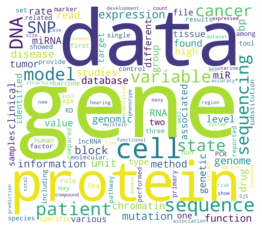

2018년 G&I논문에 가장 많이 등장한 단어 20개는 다음과 같아요!



,키워드,빈도
Rank 1,gene,1.0
Rank 2,data,0.652
Rank 3,protein,0.48
Rank 4,cell,0.48
Rank 5,sequence,0.479
Rank 6,DNA,0.443
Rank 7,patient,0.436
Rank 8,model,0.405
Rank 9,sequencing,0.382
Rank 10,variable,0.373


[키워드로 논문찾기]
위의 20개 중 원하는 키워드를 입력하세요! 2018년의 논문 중 키워드를 언급한 논문들을 찾아줄게요. ex) RNA 
찾고싶은 키워드가 없다면 없음 이라고 입력해주세요.
u
키워드 입력이 올바르지 않아요. 위의 20개 중에서 다시 입력해주세요.
없음

원하는 키워드가 없으시군요! 프로그램을 종료합니다.




SystemExit: 1

C:\Users\kimyujin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [27]:

showingWordcloud()
appearWord()
    
    
findSentence()  

df = pd.DataFrame(findList,index=[x for x in range(1,len(findList)+1)])
finalshowing=df.style.format({'url': make_clickable}).bar(subset=['등장횟수'], color='#d65f5f')
finalshowing

# pandas 표를 출력시켜 사용자 입력에 대한 최종 결과를 보여줍니다.